In [1]:
import os
from docx import Document
from PyPDF2 import PdfReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import spacy
import string
import re
import contractions
from spacy import displacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
#pip install PyPDF2

In [3]:
#pip install python-docx


In [4]:
def extract_pdf(file_path):
    reader=PdfReader(file_path)
    text=''
    for i in range(0,len(reader.pages)):
        text += reader.pages[i].extract_text()
    return text
        
def extract_doc(file_path):
    doc=Document(file_path)
    text=''
    for i in range (0,len(doc.paragraphs)):
        text += doc.paragraphs[i].text
    return text

def extract_text(directory_path,foldername):
    data=[]
    for file in os.listdir(directory_path):
        if file.endswith('.pdf'):
            text=extract_pdf(os.path.join(directory_path,file))
            data.append({'category':foldername,'Resumes':text})
            
        elif file.endswith(".docx"):
            text=extract_doc(os.path.join(directory_path,file))
            data.append({'category':foldername,'Resumes':text})
    return data

In [5]:
react=extract_text("C:\\Users\\aksha\\OneDrive\\Desktop\\project resume\\Dataset Details-20240402T131050Z-001 (1)\\Dataset Details\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes\\React",'React')
react_df=pd.DataFrame(react)

In [6]:
Peoplesoft=extract_text("C:\\Users\\aksha\\OneDrive\\Desktop\\project resume\\Dataset Details-20240402T131050Z-001 (1)\\Dataset Details\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes\\Peoplesoft resumes",'Peoplesoft')
Peoplesoft_df=pd.DataFrame(Peoplesoft)

In [7]:
SQL=extract_text("C:\\Users\\aksha\\OneDrive\\Desktop\\project resume\\Dataset Details-20240402T131050Z-001 (1)\\Dataset Details\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes\\SQL Developer Lightning insight",'SQL')
SQL_df=pd.DataFrame(SQL)

In [8]:
workday=extract_text("C:\\Users\\aksha\\OneDrive\\Desktop\\project resume\\Dataset Details-20240402T131050Z-001 (1)\\Dataset Details\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes\\workday resumes",'workday')
workday_df=pd.DataFrame(workday)

In [9]:

internship=extract_text("C:\\Users\\aksha\\OneDrive\\Desktop\\project resume\\Dataset Details-20240402T131050Z-001 (1)\\Dataset Details\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes\\Internship",'Internship')
internship_df=pd.DataFrame(internship)

In [10]:
resume_df=pd.concat([react_df,Peoplesoft_df,SQL_df,workday_df,internship_df])

In [11]:
resume_df.reset_index(drop=True ,inplace=True)

In [12]:
resume_df

category                                            Resumes
0        React  Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...
1        React  HARIPRIYA BATTINA Experience as UI Developer i...
2        React  KAMALAKAR REDDY. A Linked In: https://www.link...
3        React  Naveen SadhuTitle: software developer\t\t\t\t ...
4        React  PROFILESearching for the opportunity to bring ...
..         ...                                                ...
74     workday  WORKDAY | HCM | FCMName \t\t: Kumar S.SRole \t...
75     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
76     workday                                                ...
77  Internship  Name: Ravali P                                ...
78  Internship    SUSOVAN  BAG   Seeking  a  challenging  posi...

[79 rows x 2 columns]

In [13]:
label=LabelEncoder()
new_df=resume_df.copy()
new_df['category_label']=label.fit_transform(resume_df['category'])

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        79 non-null     object
 1   Resumes         79 non-null     object
 2   category_label  79 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.7+ KB


### Duplicated

In [15]:
new_df.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [16]:
new_df.drop_duplicates(keep='first',inplace=True)

In [17]:
new_df.reset_index(inplace=True,drop=True)

In [18]:
new_df

category                                            Resumes  \
0        React  Kanumuru Deepak ReddyCAREER OBJECTIVE:To secur...   
1        React  HARIPRIYA BATTINA Experience as UI Developer i...   
2        React  KAMALAKAR REDDY. A Linked In: https://www.link...   
3        React  Naveen SadhuTitle: software developer\t\t\t\t ...   
4        React  PROFILESearching for the opportunity to bring ...   
..         ...                                                ...   
72     workday  WORKDAY | HCM | FCMName \t\t: Kumar S.SRole \t...   
73     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
74     workday                                                ...   
75  Internship  Name: Ravali P                                ...   
76  Internship    SUSOVAN  BAG   Seeking  a  challenging  posi...   

    category_label  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
72               4  
73               4  
74               4  
75               0  
76               0  

[77 rows x 3 columns]

In [19]:
new_df.category.value_counts()

workday       21
React         20
Peoplesoft    20
SQL           14
Internship     2
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

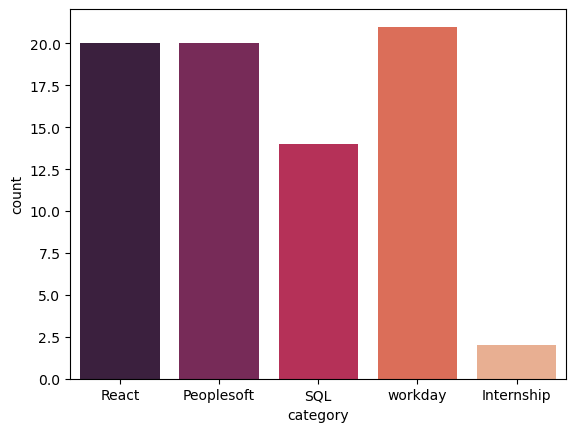

In [20]:
sns.countplot(x='category',data=new_df,palette='rocket')

In [21]:
new_df2=new_df.copy()

### Lower

In [22]:
def tex_lowe(text):
    text=text.lower()
    return text

In [23]:
new_df2['Resumes']=new_df2["Resumes"].apply(tex_lowe)

### Remove Emails

In [24]:
def remove_emails(text):
    cleaned_text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    return cleaned_text

In [25]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_emails)

### Removing URL

In [26]:
def remove_url(text):
    text=re.sub(r'https?://\S+|www\.\S+',' ',text)
    return text

In [27]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_url)

### Remove Numbers

In [28]:
def num_rem(text):
    text=re.sub(r'\d+',' ',text)
    return text

In [29]:
new_df2['Resumes']=new_df2['Resumes'].apply(num_rem)


### Remove Punctuations

In [30]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [31]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_punctuation)

### Remove unwanted symbols

In [32]:
def remove_unwan(text):
    text=re.sub("[^A-Za-z]+"," ",text)
    return text

In [33]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_unwan)

### Removing stop words

In [34]:
def remove_stopwrd(text):
    text=text.split(' ')
    stpword=stopwords.words('english')
    new_text=[x for x in text if x not in stpword]
    new_text2=' '.join(new_text)
    return new_text2

In [35]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_stopwrd)

### Lemmatization

In [36]:
def lemmma(text):
    doc=nlp(text)
    lem=' '.join(i.lemma_ for i in doc)
    return lem

In [37]:
nlp=spacy.load('en_core_web_sm')

In [38]:
new_df2['Resumes']=new_df2['Resumes'].apply(lemmma)

### Removing Single Characters 

In [39]:
def remove_single_chars(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_single_char = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_single_char

In [40]:
new_df2['Resumes']=new_df2['Resumes'].apply(remove_single_chars)

### POSTAG

In [41]:
def postag(text):
    doc=nlp(text)
    postag=' '.join(f"{i.text}-{i.pos_}," for i in doc)
    return postag

In [42]:
new_df2['pos']=new_df2['Resumes'].apply(postag)

### NER

In [43]:
text=[x.strip() for x in new_df2['Resumes']]
text2=' '.join(text)
doc=nlp(text2)
displacy.render(doc,style='ent',jupyter=True)

In [44]:
def ent(text):
    doc=nlp(text)
    entity=[(i.text, i.label_) for i in doc.ents]
    return entity

In [45]:
new_df2['NER']=new_df2['Resumes'].apply(ent)

In [46]:
new_df2

category                                            Resumes  \
0        React  kanumuru deepak reddycareer objectiveto secure...   
1        React  haripriya battina experience ui developer reac...   
2        React  kamalakar reddy link professional summary year...   
3        React  naveen sadhutitle software developer location ...   
4        React  profilesearche opportunity bring year experien...   
..         ...                                                ...   
72     workday  workday hcm fcmname kumar ssrole workday consu...   
73     workday  venkateswarlub workday consultant year experie...   
74     workday    vinay kumar workday functional consultantexp...   
75  Internship  name ravali curriculum vitae specialization co...   
76  Internship    susovan bag seek challenge position field sc...   

    category_label                                                pos  \
0                2  kanumuru-PROPN, deepak-PROPN, reddycareer-NOUN...   
1                2  haripriya-PROPN, battina-PROPN, experience-PRO...   
2                2  kamalakar-PROPN, reddy-PROPN, link-VERB, profe...   
3                2  naveen-PROPN, sadhutitle-NOUN, software-NOUN, ...   
4                2  profilesearche-NOUN, opportunity-NOUN, bring-V...   
..             ...                                                ...   
72               4  workday-PROPN, hcm-PROPN, fcmname-PROPN, kumar...   
73               4  venkateswarlub-NOUN, workday-NOUN, consultant-...   
74               4    -SPACE, vinay-PROPN, kumar-PROPN, workday-PR...   
75               0  name-PROPN, ravali-PROPN, curriculum-NOUN, vit...   
76               0    -SPACE, susovan-NOUN, bag-NOUN, seek-VERB, c...   

                                                  NER  
0   [(kanumuru deepak, PERSON), (year, DATE), (pvt...  
1   [(haripriya battina, PERSON), (neerukonda inst...  
2   [(year, DATE), (js redux, PERSON), (jira git, ...  
3   [(india, GPE), (conceptseducationbachelor, PER...  
4   [(java javascript, PERSON), (mysql spring, ORG...  
..                                                ...  
72  [(workday, DATE), (kumar, PERSON), (year, DATE...  
73  [(workday consultant year, DATE), (year, DATE)...  
74  [(vinay kumar, PERSON), (workday, DATE), (work...  
75  [(java skill good knowledge, PERSON), (english...  
76  [(susovan bag seek, PERSON), (cjava htmlcss sq...  

[77 rows x 5 columns]

### Entity Count

In [47]:
def count_values(row):
    count_dict = {}
    for entity, label in row:
        if label in count_dict:
            count_dict[label] += 1
        else:
            count_dict[label] = 1
    return count_dict

In [48]:
new_df2['value_counts']=new_df2['NER'].apply(count_values)

In [49]:
new_df2

category                                            Resumes  \
0        React  kanumuru deepak reddycareer objectiveto secure...   
1        React  haripriya battina experience ui developer reac...   
2        React  kamalakar reddy link professional summary year...   
3        React  naveen sadhutitle software developer location ...   
4        React  profilesearche opportunity bring year experien...   
..         ...                                                ...   
72     workday  workday hcm fcmname kumar ssrole workday consu...   
73     workday  venkateswarlub workday consultant year experie...   
74     workday    vinay kumar workday functional consultantexp...   
75  Internship  name ravali curriculum vitae specialization co...   
76  Internship    susovan bag seek challenge position field sc...   

    category_label                                                pos  \
0                2  kanumuru-PROPN, deepak-PROPN, reddycareer-NOUN...   
1                2  haripriya-PROPN, battina-PROPN, experience-PRO...   
2                2  kamalakar-PROPN, reddy-PROPN, link-VERB, profe...   
3                2  naveen-PROPN, sadhutitle-NOUN, software-NOUN, ...   
4                2  profilesearche-NOUN, opportunity-NOUN, bring-V...   
..             ...                                                ...   
72               4  workday-PROPN, hcm-PROPN, fcmname-PROPN, kumar...   
73               4  venkateswarlub-NOUN, workday-NOUN, consultant-...   
74               4    -SPACE, vinay-PROPN, kumar-PROPN, workday-PR...   
75               0  name-PROPN, ravali-PROPN, curriculum-NOUN, vit...   
76               0    -SPACE, susovan-NOUN, bag-NOUN, seek-VERB, c...   

                                                  NER  \
0   [(kanumuru deepak, PERSON), (year, DATE), (pvt...   
1   [(haripriya battina, PERSON), (neerukonda inst...   
2   [(year, DATE), (js redux, PERSON), (jira git, ...   
3   [(india, GPE), (conceptseducationbachelor, PER...   
4   [(java javascript, PERSON), (mysql spring, ORG...   
..                                                ...   
72  [(workday, DATE), (kumar, PERSON), (year, DATE...   
73  [(workday consultant year, DATE), (year, DATE)...   
74  [(vinay kumar, PERSON), (workday, DATE), (work...   
75  [(java skill good knowledge, PERSON), (english...   
76  [(susovan bag seek, PERSON), (cjava htmlcss sq...   

                                         value_counts  
0   {'PERSON': 2, 'DATE': 3, 'ORG': 3, 'CARDINAL': 1}  
1   {'PERSON': 3, 'ORG': 3, 'DATE': 4, 'GPE': 1, '...  
2   {'DATE': 2, 'PERSON': 4, 'LOC': 1, 'NORP': 1, ...  
3                   {'GPE': 1, 'PERSON': 1, 'ORG': 1}  
4                  {'PERSON': 7, 'ORG': 2, 'DATE': 2}  
..                                                ...  
72  {'DATE': 16, 'PERSON': 2, 'CARDINAL': 1, 'ORG'...  
73               {'DATE': 8, 'CARDINAL': 2, 'GPE': 1}  
74                 {'PERSON': 1, 'DATE': 6, 'ORG': 6}  
75  {'PERSON': 1, 'LANGUAGE': 1, 'NORP': 1, 'GPE':...  
76                  {'PERSON': 2, 'ORG': 2, 'GPE': 1}  

[77 rows x 6 columns]

In [50]:
new_df3=new_df2[['Resumes','category','category_label']]

### CountVectorizer

### Unigram

In [51]:
vectorizer=CountVectorizer(ngram_range=(1,1))
x=vectorizer.fit_transform(new_df3['Resumes'])

In [52]:
array_x=x.toarray()
array_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
new_df4=pd.DataFrame(array_x)

In [54]:
text=new_df3['Resumes'].to_list()
text2=' '.join(text)
text2

'kanumuru deepak reddycareer objectiveto secure position repute organization efficiently contribute knowledge skill growth organization build professional careeracademic qualificationsprojecttitle density base traffic control system use arduinoduration monthsdescription traffic congestion severe problem city across world become nightmare citizen cause delay signal inappropriate timing traffic signal etc delay traffic light hard code depend traffic therefore optimise traffic control increase demand systematic quick automatic system project design develop density base dynamic traffic signal control signal timing change automatically sense traffic density junction microcontroller use project arduino system contain ir sensor ultrasonic sensor transmitter receiver mount either side road pole get activate receive signal vehicle pass close itexperience carry experience year metrolabs services pvt ltd role responsibility year extensive experience front end developer solid understand website ap

In [55]:
new_df5=new_df4.join(new_df3[['category','category_label']])

In [56]:
vectorizer.vocabulary_.items()

dict_items([('kanumuru', 2614), ('deepak', 1225), ('reddycareer', 3947), ('objectiveto', 3198), ('secure', 4331), ('position', 3538), ('repute', 4057), ('organization', 3277), ('efficiently', 1511), ('contribute', 984), ('knowledge', 2634), ('skill', 4523), ('growth', 2091), ('build', 613), ('professional', 3687), ('careeracademic', 662), ('qualificationsprojecttitle', 3848), ('density', 1255), ('base', 471), ('traffic', 5147), ('control', 988), ('system', 4864), ('use', 5316), ('arduinoduration', 315), ('monthsdescription', 3021), ('congestion', 908), ('severe', 4453), ('problem', 3626), ('city', 745), ('across', 43), ('world', 5555), ('become', 498), ('nightmare', 3144), ('citizen', 744), ('cause', 682), ('delay', 1233), ('signal', 4489), ('inappropriate', 2308), ('timing', 5095), ('etc', 1675), ('light', 2721), ('hard', 2124), ('code', 788), ('depend', 1258), ('therefore', 5060), ('optimise', 3259), ('increase', 2318), ('demand', 1248), ('systematic', 4866), ('quick', 3868), ('autom

In [57]:
word_count=x.sum(axis=0)

In [58]:
word_count

matrix([[1, 2, 1, ..., 1, 1, 2]], dtype=int64)

In [59]:
word_freq=[(i,word_count[0,j]) for i,j in vectorizer.vocabulary_.items()]
word_df=pd.DataFrame(word_freq,columns=['word','frequency'])
word_df.sort_values(by='frequency',ascending=False,inplace=True)
freq=word_df[word_df['frequency']!=1].index.tolist()
word_df[0:10]

word  frequency
591        report        440
22            use        418
95    application        408
352        server        385
1634   peoplesoft        343
4210      workday        337
80     experience        320
1655  integration        304
121          work        266
342      business        248

### Top 10 Repeated Words

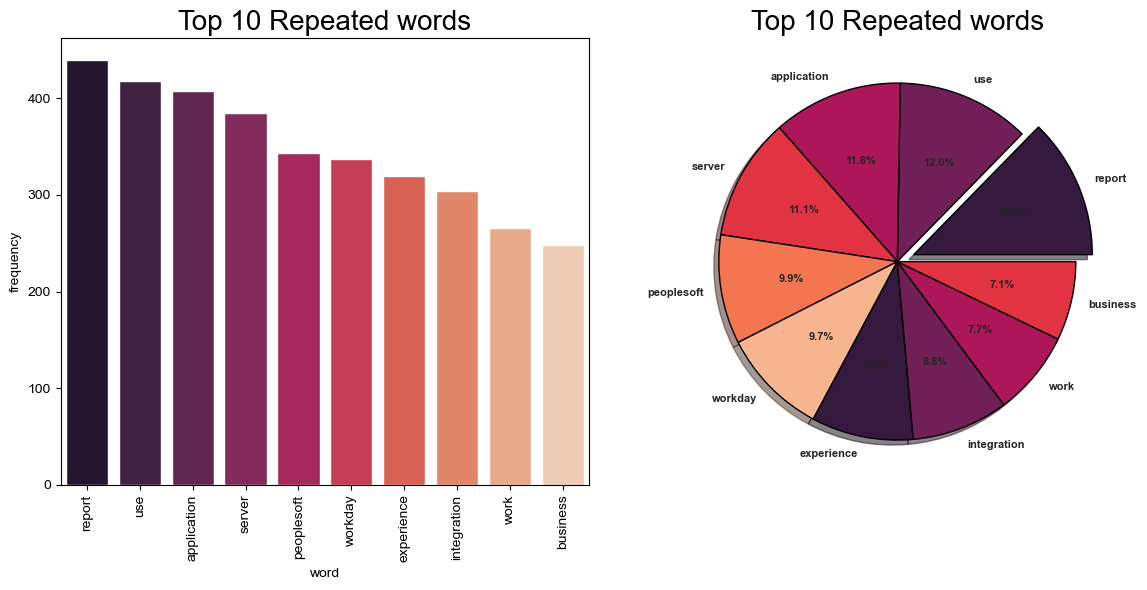

In [60]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df['frequency'][0:10],labels=word_df['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [61]:
new_df5

0  1  2  3  4  5  6  7  8  9  ...  5591  5592  5593  5594  5595  5596  \
0   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
1   0  0  0  0  0  1  0  0  0  0  ...     0     2     0     0     0     0   
2   0  0  0  0  1  0  0  0  0  0  ...     0     0     0     0     0     0   
3   0  0  0  0  2  0  0  0  0  0  ...     0     0     0     0     0     0   
4   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
.. .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
72  0  0  0  0  0  0  0  0  1  0  ...     0     0     0     0     0     0   
73  0  0  0  1  0  0  0  0  1  0  ...     0     0     0     0     0     0   
74  0  0  0  0  1  0  0  0  1  0  ...     0     0     0     0     0     0   
75  0  0  0  0  0  1  0  0  0  0  ...     0     0     0     0     0     0   
76  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

    5597  5598    category  category_label  
0      0     0       React               2  
1      0     0       React               2  
2      0     0       React               2  
3      0     0       React               2  
4      0     0       React               2  
..   ...   ...         ...             ...  
72     0     0     workday               4  
73     0     0     workday               4  
74     0     0     workday               4  
75     0     0  Internship               0  
76     0     0  Internship               0  

[77 rows x 5601 columns]

In [62]:
new_df6=new_df5[freq].copy()
new_df6[['category','category_label']]=new_df5[['category','category_label']].copy()

In [63]:
new_df6.to_csv('finaldata.csv',index=False)

In [64]:
new_df6

591  22  95  352  1634  4210  80  1655  121  342  ...  1394  1678  33  \
0     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
1     0   0   0    1     0     0   0     0    0    0  ...     0     0   0   
2     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
3     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
4     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
..  ...  ..  ..  ...   ...   ...  ..   ...  ...  ...  ...   ...   ...  ..   
72    0   1   0    0     0     0   0     0    0    0  ...     0     0   0   
73    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
74    0   0   1    0     0     0   0     0    0    0  ...     0     0   0   
75    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
76    0   0   1    0     0     0   0     0    0    0  ...     0     0   0   

    1491  5063  3401  5069  1167    category  category_label  
0      0     0     0     0     0       React               2  
1      0     0     0     0     0       React               2  
2      0     0     0     0     0       React               2  
3      0     0     0     0     0       React               2  
4      0     0     0     0     0       React               2  
..   ...   ...   ...   ...   ...         ...             ...  
72     0     0     0     0     0     workday               4  
73     0     0     0     0     0     workday               4  
74     0     0     0     0     0     workday               4  
75     0     0     0     0     0  Internship               0  
76     0     0     0     0     0  Internship               0  

[77 rows x 2282 columns]

### Bigram

In [65]:
vectorizer2=CountVectorizer(ngram_range=(2,2))
x2=vectorizer2.fit_transform(new_df3['Resumes'])

In [66]:
array_x2=x2.toarray()
array_x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
vectorizer2.vocabulary_.items()

dict_items([('kanumuru deepak', 8655), ('deepak reddycareer', 4096), ('reddycareer objectiveto', 12941), ('objectiveto secure', 10516), ('secure position', 14156), ('position repute', 11715), ('repute organization', 13344), ('organization efficiently', 10797), ('efficiently contribute', 5082), ('contribute knowledge', 3042), ('knowledge skill', 8779), ('skill growth', 14866), ('growth organization', 6892), ('organization build', 10787), ('build professional', 1683), ('professional careeracademic', 12145), ('careeracademic qualificationsprojecttitle', 1936), ('qualificationsprojecttitle density', 12675), ('density base', 4203), ('base traffic', 1314), ('traffic control', 16901), ('control system', 3069), ('system use', 15966), ('use arduinoduration', 17466), ('arduinoduration monthsdescription', 930), ('monthsdescription traffic', 10055), ('traffic congestion', 16900), ('congestion severe', 2834), ('severe problem', 14705), ('problem city', 11881), ('city across', 2177), ('across world'

In [68]:
df_bi1=pd.DataFrame(array_x2)
df_bi1

0      1      2      3      4      5      6      7      8      9      ...  \
0       0      0      0      0      0      0      0      0      0      0  ...   
1       0      0      0      0      0      0      0      0      0      0  ...   
2       0      0      0      0      0      0      0      0      0      0  ...   
3       0      0      0      0      0      0      0      0      0      1  ...   
4       0      0      0      0      0      0      0      0      0      0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
72      0      0      0      0      0      0      0      0      0      0  ...   
73      0      0      0      1      0      0      0      0      0      0  ...   
74      0      0      0      0      0      0      0      0      0      0  ...   
75      0      0      0      0      0      0      0      0      0      0  ...   
76      0      0      0      0      0      0      0      0      0      0  ...   

    18789  18790  18791  18792  18793  18794  18795  18796  18797  18798  
0       0      0      0      0      0      0      0      0      0      0  
1       1      1      0      0      0      0      0      0      0      0  
2       0      0      0      0      0      0      0      0      0      0  
3       0      0      0      0      0      0      0      0      0      0  
4       0      0      0      0      0      0      0      0      0      0  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
72      0      0      0      0      0      0      0      0      0      0  
73      0      0      0      0      0      0      0      0      0      0  
74      0      0      0      0      0      0      0      0      0      0  
75      0      0      0      0      0      0      0      0      0      0  
76      0      0      0      0      0      0      0      0      0      0  

[77 rows x 18799 columns]

In [69]:
word_count2=x2.sum(axis=0)

In [70]:
word_freq2=[(i,word_count2[0,j]) for i,j in vectorizer2.vocabulary_.items()]

In [71]:
word_df2=pd.DataFrame(word_freq2,columns=['word','frequency'])
word_df2.sort_values(by='frequency',ascending=False,inplace=True)
freq2=word_df2[word_df2['frequency']!=1].index.tolist()
word_df2[0:10]

word  frequency
3546   application server        117
3550    process scheduler        104
479            sql server         89
7364        custom report         69
12581    business process         64
3864           web server         62
3611          people tool         59
12604     calculate field         57
523       year experience         57
12576      core connector         53

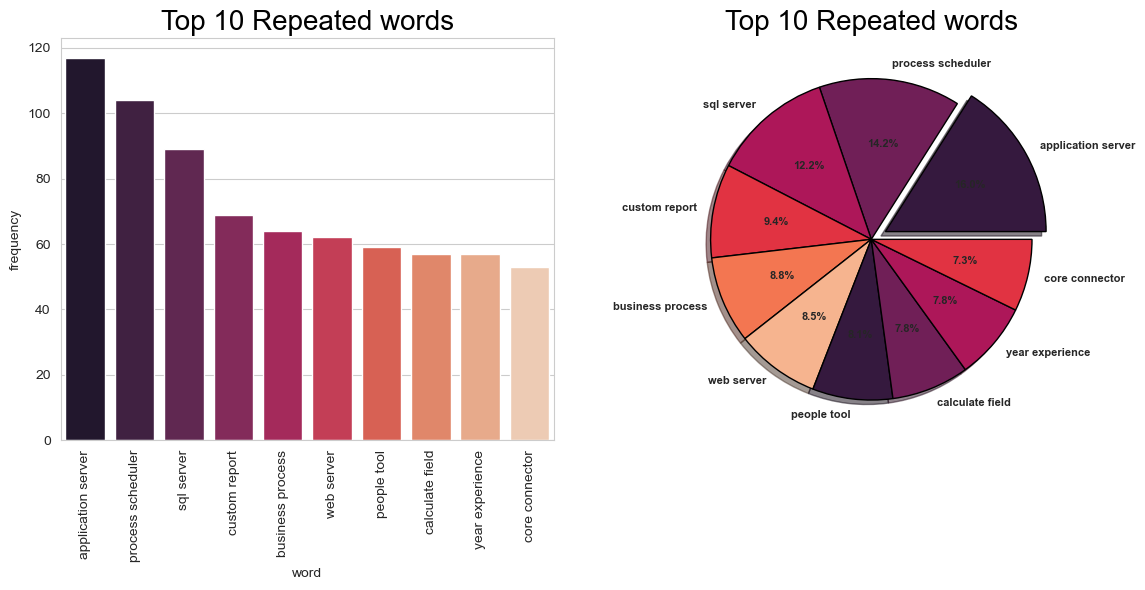

In [72]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df2[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df2['frequency'][0:10],labels=word_df2['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [73]:
df_bi2=df_bi1.join(new_df3[['category','category_label']])

In [74]:
df_bi3=df_bi2[freq].copy()
df_bi3[['category','category_label']]=df_bi2[['category','category_label']].copy()
df_bi3

591  22  95  352  1634  4210  80  1655  121  342  ...  1394  1678  33  \
0     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
1     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
2     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
3     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
4     0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
..  ...  ..  ..  ...   ...   ...  ..   ...  ...  ...  ...   ...   ...  ..   
72    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
73    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
74    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
75    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   
76    0   0   0    0     0     0   0     0    0    0  ...     0     0   0   

    1491  5063  3401  5069  1167    category  category_label  
0      0     0     0     0     0       React               2  
1      0     0     0     0     0       React               2  
2      0     1     0     0     0       React               2  
3      0     0     0     0     0       React               2  
4      0     0     0     0     0       React               2  
..   ...   ...   ...   ...   ...         ...             ...  
72     0     0     0     0     0     workday               4  
73     0     0     0     0     0     workday               4  
74     0     0     0     0     0     workday               4  
75     0     0     0     0     0  Internship               0  
76     0     0     0     0     0  Internship               0  

[77 rows x 2282 columns]

In [75]:
df_bi3.to_csv('bidf.csv',index=False)

### Unigram And Bigram

In [76]:
vectorizer3=CountVectorizer(ngram_range=(1,2))
x3=vectorizer3.fit_transform(new_df3['Resumes'])
array_x3=x3.toarray()
array_x3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
vectorizer3.vocabulary_.items()

dict_items([('kanumuru', 11269), ('deepak', 5321), ('reddycareer', 16888), ('objectiveto', 13712), ('secure', 18483), ('position', 15242), ('repute', 17401), ('organization', 14060), ('efficiently', 6593), ('contribute', 4024), ('knowledge', 11334), ('skill', 19368), ('growth', 8980), ('build', 2278), ('professional', 15831), ('careeracademic', 2598), ('qualificationsprojecttitle', 16523), ('density', 5458), ('base', 1749), ('traffic', 22046), ('control', 4037), ('system', 20741), ('use', 22776), ('arduinoduration', 1245), ('monthsdescription', 13076), ('congestion', 3742), ('severe', 19158), ('problem', 15505), ('city', 2922), ('across', 172), ('world', 24179), ('become', 1875), ('nightmare', 13505), ('citizen', 2919), ('cause', 2659), ('delay', 5370), ('signal', 19258), ('inappropriate', 9883), ('timing', 21815), ('etc', 7262), ('light', 11735), ('hard', 9085), ('code', 3133), ('depend', 5471), ('therefore', 21679), ('optimise', 13939), ('increase', 9969), ('demand', 5432), ('systema

In [78]:
word_count3=x3.sum(axis=0)
df_ub1=pd.DataFrame(array_x3)
word_freq3=[(i,word_count3[0,j]) for i,j in vectorizer3.vocabulary_.items()]
word_df3=pd.DataFrame(word_freq3,columns=['word','frequency'])
word_df3.sort_values(by='frequency',ascending=False,inplace=True)
freq3=word_df3[word_df3['frequency']!=1].index.tolist()
word_df3[0:10]

word  frequency
1432        report        440
22             use        418
95     application        408
646         server        385
5122    peoplesoft        343
16754      workday        337
80      experience        320
5143   integration        304
121           work        266
636       business        248

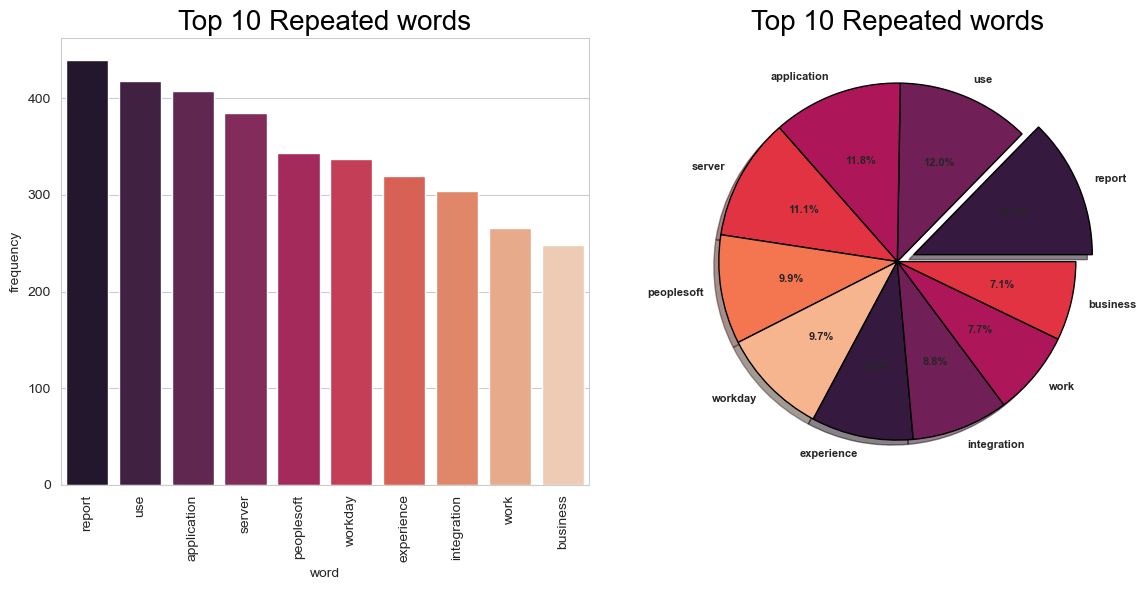

In [79]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df3[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df3['frequency'][0:10],labels=word_df3['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [80]:
df_ub2=df_ub1[freq3].copy()
df_ub2[['category','category_label']]=new_df3[['category','category_label']].copy()
df_ub2

1432  22  95  646  5122  16754  80  5143  121  636  ...  20540  4730  \
0      0   0   0    0     0      0   0     0    0    0  ...      0     0   
1      0   0   0    0     0      0   0     0    0    0  ...      0     0   
2      0   0   0    0     0      0   0     0    0    0  ...      0     0   
3      0   0   0    0     0      0   0     0    0    0  ...      0     0   
4      0   0   0    0     0      0   0     0    0    0  ...      0     0   
..   ...  ..  ..  ...   ...    ...  ..   ...  ...  ...  ...    ...   ...   
72     0   0   0    0     0      0   0     0    0    0  ...      0     1   
73     0   0   0    0     0      0   0     0    0    0  ...      0     0   
74     0   0   0    0     0      0   0     0    0    0  ...      0     0   
75     0   0   0    0     0      0   0     0    0    0  ...      0     0   
76     0   0   0    0     0      0   0     0    0    0  ...      0     0   

    20491  3428  4801  4728  4727  5166    category  category_label  
0       0     0     0     0     0     0       React               2  
1       0     0     0     0     0     0       React               2  
2       0     0     0     0     0     0       React               2  
3       0     0     0     0     0     0       React               2  
4       0     0     0     0     0     0       React               2  
..    ...   ...   ...   ...   ...   ...         ...             ...  
72      0     0     0     0     0     1     workday               4  
73      0     0     0     0     0     0     workday               4  
74      0     0     0     0     0     1     workday               4  
75      0     0     0     0     0     0  Internship               0  
76      0     0     0     0     0     0  Internship               0  

[77 rows x 6661 columns]

In [81]:
df_ub2.to_csv('ub_df.csv',index=False)

### TFIDF Unigram

In [82]:
vectorizer4=TfidfVectorizer()
x4=vectorizer4.fit_transform(new_df3['Resumes'])
array_x4=x4.toarray()
array_x4

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
vectorizer4.vocabulary_.items()

dict_items([('kanumuru', 2614), ('deepak', 1225), ('reddycareer', 3947), ('objectiveto', 3198), ('secure', 4331), ('position', 3538), ('repute', 4057), ('organization', 3277), ('efficiently', 1511), ('contribute', 984), ('knowledge', 2634), ('skill', 4523), ('growth', 2091), ('build', 613), ('professional', 3687), ('careeracademic', 662), ('qualificationsprojecttitle', 3848), ('density', 1255), ('base', 471), ('traffic', 5147), ('control', 988), ('system', 4864), ('use', 5316), ('arduinoduration', 315), ('monthsdescription', 3021), ('congestion', 908), ('severe', 4453), ('problem', 3626), ('city', 745), ('across', 43), ('world', 5555), ('become', 498), ('nightmare', 3144), ('citizen', 744), ('cause', 682), ('delay', 1233), ('signal', 4489), ('inappropriate', 2308), ('timing', 5095), ('etc', 1675), ('light', 2721), ('hard', 2124), ('code', 788), ('depend', 1258), ('therefore', 5060), ('optimise', 3259), ('increase', 2318), ('demand', 1248), ('systematic', 4866), ('quick', 3868), ('autom

In [84]:
word_count4=x4.sum(axis=0)
word_freq4=[(i,word_count4[0,j]) for i,j in vectorizer4.vocabulary_.items()]
word_df4=pd.DataFrame(word_freq4,columns=['word','frequency'])
word_df4.sort_values(by='frequency',ascending=False,inplace=True)

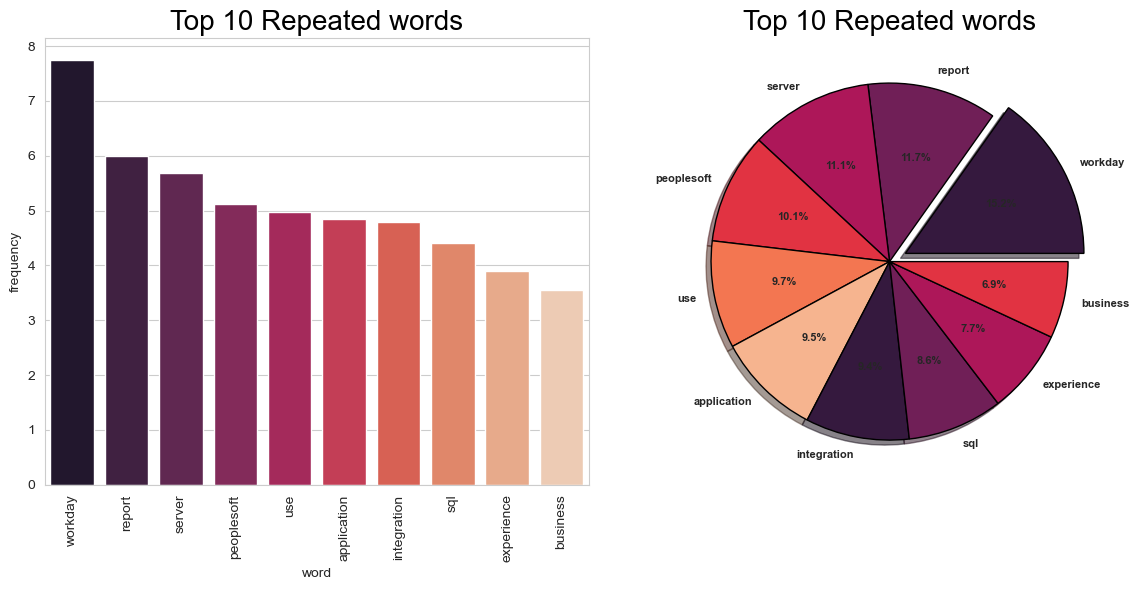

In [85]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df4[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df4['frequency'][0:10],labels=word_df4['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [86]:
df_tf1=pd.DataFrame(array_x4)
df_tf1[['category','category_label']]=new_df3[['category','category_label']].copy()
df_tf1.to_csv('tfuni.csv',index=False)
df_tf1

0    1    2         3         4         5    6    7         8    9  ...  \
0   0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  ...   
1   0.0  0.0  0.0  0.000000  0.000000  0.063919  0.0  0.0  0.000000  0.0  ...   
2   0.0  0.0  0.0  0.000000  0.033643  0.000000  0.0  0.0  0.000000  0.0  ...   
3   0.0  0.0  0.0  0.000000  0.108764  0.000000  0.0  0.0  0.000000  0.0  ...   
4   0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  ...   
..  ...  ...  ...       ...       ...       ...  ...  ...       ...  ...  ...   
72  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.023290  0.0  ...   
73  0.0  0.0  0.0  0.083408  0.000000  0.000000  0.0  0.0  0.051362  0.0  ...   
74  0.0  0.0  0.0  0.000000  0.026954  0.000000  0.0  0.0  0.036208  0.0  ...   
75  0.0  0.0  0.0  0.000000  0.000000  0.055371  0.0  0.0  0.000000  0.0  ...   
76  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  ...   

    5591      5592  5593  5594  5595  5596  5597  5598    category  \
0    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0       React   
1    0.0  0.159098   0.0   0.0   0.0   0.0   0.0   0.0       React   
2    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0       React   
3    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0       React   
4    0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0       React   
..   ...       ...   ...   ...   ...   ...   ...   ...         ...   
72   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0     workday   
73   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0     workday   
74   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0     workday   
75   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  Internship   
76   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  Internship   

    category_label  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
72               4  
73               4  
74               4  
75               0  
76               0  

[77 rows x 5601 columns]

### TFIDF Bigram

In [87]:
vectorizer5=TfidfVectorizer(ngram_range=(2,2))
x5=vectorizer5.fit_transform(new_df3['Resumes'])
array_x5=x5.toarray()
array_x5

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
vectorizer5.vocabulary_.items()

dict_items([('kanumuru deepak', 8655), ('deepak reddycareer', 4096), ('reddycareer objectiveto', 12941), ('objectiveto secure', 10516), ('secure position', 14156), ('position repute', 11715), ('repute organization', 13344), ('organization efficiently', 10797), ('efficiently contribute', 5082), ('contribute knowledge', 3042), ('knowledge skill', 8779), ('skill growth', 14866), ('growth organization', 6892), ('organization build', 10787), ('build professional', 1683), ('professional careeracademic', 12145), ('careeracademic qualificationsprojecttitle', 1936), ('qualificationsprojecttitle density', 12675), ('density base', 4203), ('base traffic', 1314), ('traffic control', 16901), ('control system', 3069), ('system use', 15966), ('use arduinoduration', 17466), ('arduinoduration monthsdescription', 930), ('monthsdescription traffic', 10055), ('traffic congestion', 16900), ('congestion severe', 2834), ('severe problem', 14705), ('problem city', 11881), ('city across', 2177), ('across world'

In [89]:
word_count5=x5.sum(axis=0)
word_freq5=[(i,word_count5[0,j]) for i,j in vectorizer5.vocabulary_.items()]
word_df5=pd.DataFrame(word_freq5,columns=['word','frequency'])
word_df5.sort_values(by='frequency',ascending=False,inplace=True)

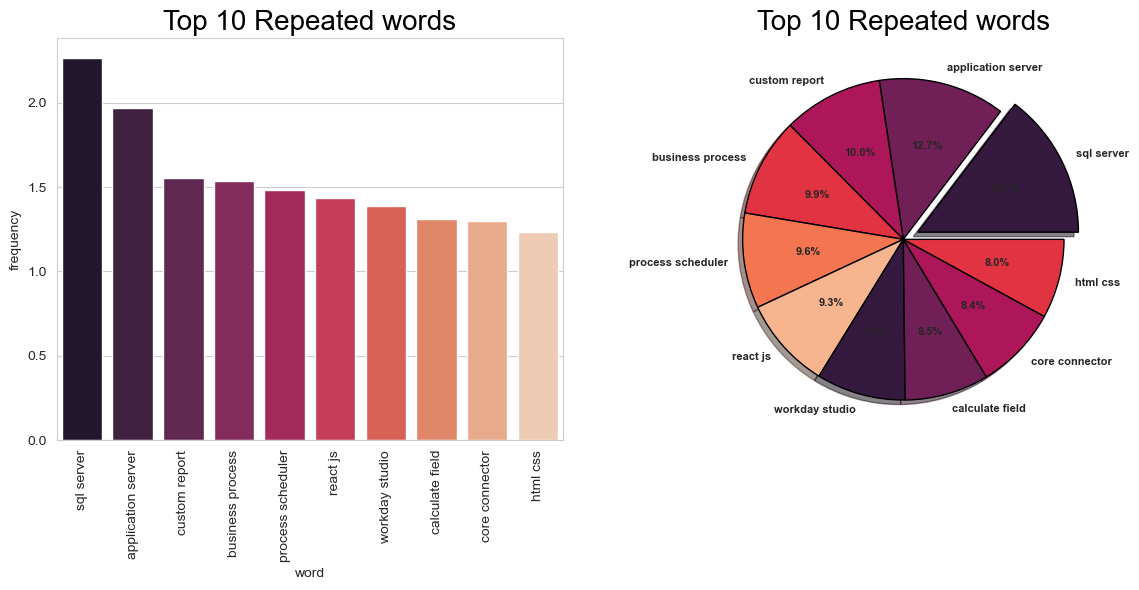

In [90]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df5[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df5['frequency'][0:10],labels=word_df5['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [91]:
df_tf2=pd.DataFrame(array_x5)
df_tf2[['category','category_label']]=new_df3[['category','category_label']].copy()
df_tf2.to_csv('tfbii.csv',index=False)
df_tf2

0    1    2         3    4    5    6    7    8         9  ...  18791  \
0   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
1   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
2   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
3   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.091508  ...    0.0   
4   0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
..  ...  ...  ...       ...  ...  ...  ...  ...  ...       ...  ...    ...   
72  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
73  0.0  0.0  0.0  0.073345  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
74  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
75  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   
76  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  ...    0.0   

    18792  18793  18794  18795  18796  18797  18798    category  \
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
1     0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
2     0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
3     0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
4     0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
..    ...    ...    ...    ...    ...    ...    ...         ...   
72    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
73    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
74    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
75    0.0    0.0    0.0    0.0    0.0    0.0    0.0  Internship   
76    0.0    0.0    0.0    0.0    0.0    0.0    0.0  Internship   

    category_label  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
72               4  
73               4  
74               4  
75               0  
76               0  

[77 rows x 18801 columns]

### TFIDF Uni And Bigram

In [92]:
vectorizer6=TfidfVectorizer(ngram_range=(1,2))
x6=vectorizer6.fit_transform(new_df3['Resumes'])
array_x6=x6.toarray()
array_x6

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
vectorizer6.vocabulary_.items()

dict_items([('kanumuru', 11269), ('deepak', 5321), ('reddycareer', 16888), ('objectiveto', 13712), ('secure', 18483), ('position', 15242), ('repute', 17401), ('organization', 14060), ('efficiently', 6593), ('contribute', 4024), ('knowledge', 11334), ('skill', 19368), ('growth', 8980), ('build', 2278), ('professional', 15831), ('careeracademic', 2598), ('qualificationsprojecttitle', 16523), ('density', 5458), ('base', 1749), ('traffic', 22046), ('control', 4037), ('system', 20741), ('use', 22776), ('arduinoduration', 1245), ('monthsdescription', 13076), ('congestion', 3742), ('severe', 19158), ('problem', 15505), ('city', 2922), ('across', 172), ('world', 24179), ('become', 1875), ('nightmare', 13505), ('citizen', 2919), ('cause', 2659), ('delay', 5370), ('signal', 19258), ('inappropriate', 9883), ('timing', 21815), ('etc', 7262), ('light', 11735), ('hard', 9085), ('code', 3133), ('depend', 5471), ('therefore', 21679), ('optimise', 13939), ('increase', 9969), ('demand', 5432), ('systema

In [94]:
word_count6=x6.sum(axis=0)
word_freq6=[(i,word_count6[0,j]) for i,j in vectorizer6.vocabulary_.items()]
word_df6=pd.DataFrame(word_freq6,columns=['word','frequency'])
word_df6.sort_values(by='frequency',ascending=False,inplace=True)

In [95]:
word_df6

word  frequency
16754            workday   5.411166
1432              report   4.168823
646               server   3.943306
5122          peoplesoft   3.519415
22                   use   3.377019
...                  ...        ...
7849         dutiesworke   0.011860
7848   databasesdevelope   0.011860
8613        initial pass   0.011860
7846              helped   0.011860
8235        unix windows   0.011860

[24398 rows x 2 columns]

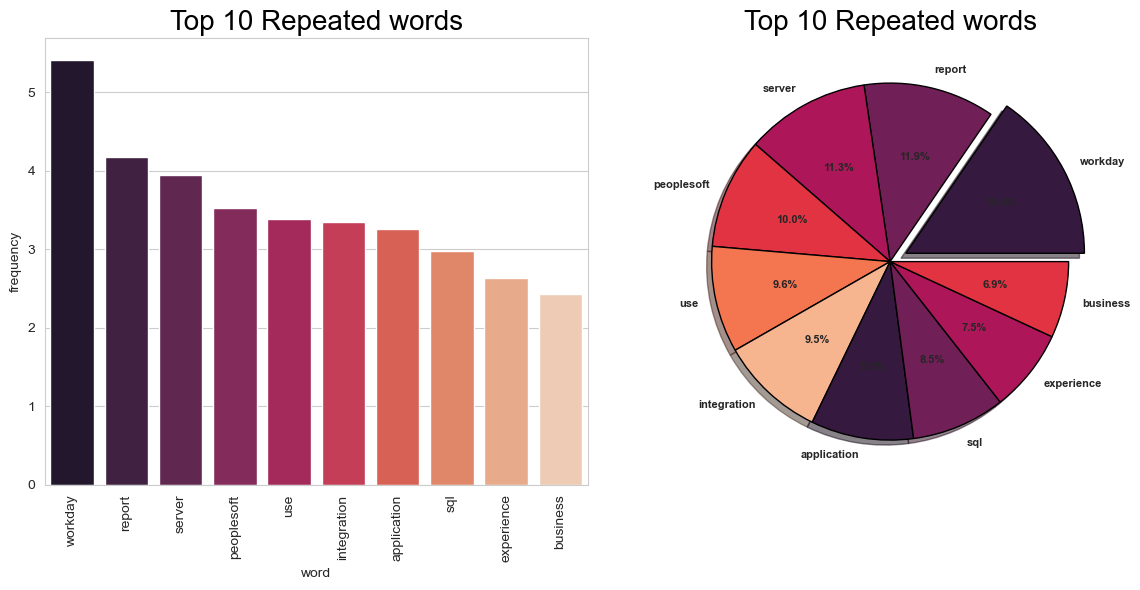

In [96]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.set_style(style='whitegrid')
sns.barplot(x='word',y='frequency',data=word_df6[0:10],palette='rocket',ax=axs[0])
axs[0].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(word_df6['frequency'][0:10],labels=word_df6['word'][0:10],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 9,
            colors=color)
axs[1].set_title('Top 10 Repeated words',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [97]:
df_tf3=pd.DataFrame(array_x6)
df_tf3[['category','category_label']]=new_df3[['category','category_label']].copy()
df_tf3.to_csv('tf_ui_bi.csv',index=False)
df_tf3

0    1    2    3    4    5         6         7         8    9  ...  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.022342  0.0  ...   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.070191  0.0  ...   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   
..  ...  ...  ...  ...  ...  ...       ...       ...       ...  ...  ...   
72  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   
73  0.0  0.0  0.0  0.0  0.0  0.0  0.055079  0.055079  0.000000  0.0  ...   
74  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.017973  0.0  ...   
75  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   
76  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  ...   

    24390  24391  24392  24393  24394  24395  24396  24397    category  \
0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
1     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
2     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
3     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
4     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0       React   
..    ...    ...    ...    ...    ...    ...    ...    ...         ...   
72    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
73    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
74    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     workday   
75    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  Internship   
76    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  Internship   

    category_label  
0                2  
1                2  
2                2  
3                2  
4                2  
..             ...  
72               4  
73               4  
74               4  
75               0  
76               0  

[77 rows x 24400 columns]

In [98]:
import pickle

In [99]:
pickle.dump(vectorizer6,open('vectorizer.pkl','wb'))

In [109]:
df_tf3[['category','category_label']].head(50)

category  category_label
0        React               2
1        React               2
2        React               2
3        React               2
4        React               2
5        React               2
6        React               2
7        React               2
8        React               2
9        React               2
10       React               2
11       React               2
12       React               2
13       React               2
14       React               2
15       React               2
16       React               2
17       React               2
18       React               2
19       React               2
20  Peoplesoft               1
21  Peoplesoft               1
22  Peoplesoft               1
23  Peoplesoft               1
24  Peoplesoft               1
25  Peoplesoft               1
26  Peoplesoft               1
27  Peoplesoft               1
28  Peoplesoft               1
29  Peoplesoft               1
30  Peoplesoft               1
31  Peoplesoft               1
32  Peoplesoft               1
33  Peoplesoft               1
34  Peoplesoft               1
35  Peoplesoft               1
36  Peoplesoft               1
37  Peoplesoft               1
38  Peoplesoft               1
39  Peoplesoft               1
40         SQL               3
41         SQL               3
42         SQL               3
43         SQL               3
44         SQL               3
45         SQL               3
46         SQL               3
47         SQL               3
48         SQL               3
49         SQL               3